# Mendel's Pea Plant Experiments

## ${\chi}^2$ Statistic for Mendel's Data

First I calculated the ${\chi}^2$ statistic for Mendel's observations using the formula:

${\chi}^2 = ∑_i (O_i−E_i)^2/E_i$

where $E_i = $total * propability


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pylab as P
import random
%matplotlib inline

In [2]:
# load data
import csv
with open('EdwardsTable2.csv', newline = '') as file:
    data_str = list(csv.reader(file))

data_str.pop(0)
num_exp = 84 # num experiments
data = np.zeros((num_exp, 5))

# data is 84x5 array of 84 experiments with colums Exp1, Exp2, Obs1, Obs2, Total
# clean up data
for ii in range(len(data_str)):
    data_str[ii].pop(0)
    data_str[ii].pop(0)
    for jj in range(5):
        data[ii, jj] = float(data_str[ii][jj])


# Calculate X^2 - statistic for each experiment
X_sqr_m = np.zeros(num_exp)

for ii in range(np.shape(data)[0]):

    p = data[ii, 0]/(data[ii, 0] + data[ii, 1])
    q = 1-p
    N = data[ii, 4]

    Obs1 = data[ii, 2]
    Exp1 = p*N
    Obs2 = data[ii, 3]
    Exp2 = q*N
    X_sqr_m[ii] = (Obs1 - Exp1)**2/Exp1 + (Obs2 - Exp2)**2/Exp2


## Simulating All 84 Experiments

After simulating one of Mendel’s experiments 500* times and calculating the χ2 statistics for each simulation, I compare the simulation results to Mendel's data. I plot a distribution of the simulation χ2 statistics and show where Mendel’s data fall on this distribution.

*Starting with 100 trials and increasing by 100, X^2 levelled off at 500 - only increasing or decreasing slightly between runs. 

The empirical probability of observing a X^2 smaller than Mendels is 91.60%
The empirical probability of observing a X^2 larger than Mendels is 8.40%


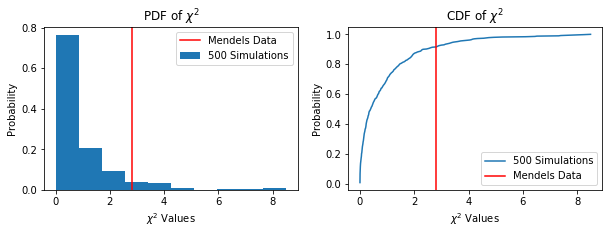

In [4]:
# Simulate experiment 1

trials = 500 # number of simulations
N = data[0, 4] # total number of observations
p = data[0, 0]/(data[0, 0] + data[0, 1])
q = 1-p

# Calculate X^2 for each simulation
a1 = np.zeros((trials, int(N)))
obs = np.zeros(trials)
X_sqr = np.zeros(trials)
for ii in range(trials):
    obs[ii] = np.random.binomial(N, p)
    X_sqr[ii] = (obs[ii] - N*p)**2/(N*p) + (N-obs[ii] - N*q)**2/(N*q)  
    
# CDF of X^2       
valsX2, freqX2 = np.unique(X_sqr, return_counts = True)
probX2 = freqX2/sum(freqX2)
cdf2 = np.zeros(len(valsX2))
for ii in range(len(valsX2)):
    if ii == 0:
        cdf2[ii] = probX2[ii]
    else:
        cdf2[ii] = cdf2[ii-1] + probX2[ii]

# Compare to Mendel's Data
X_sqr_1 = X_sqr[0] # Mendel's X^2 for 1st experiment
d = 0
while valsX2[d] < X_sqr_1:
    d += 1    
print('The empirical probability of observing a X^2 smaller than Mendels is {:.2f}%'.format(cdf2[d]*100))
print('The empirical probability of observing a X^2 larger than Mendels is {:.2f}%'.format(100 - cdf2[d]*100))


# Plot
plt.figure(1, figsize = (10, 3))
plt.subplot(121)
b = plt.hist(X_sqr, density = True, label = '{} Simulations'.format(trials))
plt.axvline(X_sqr_1, color = 'red', label = 'Mendels Data')
plt.xlabel('${\chi}^2$ Values')
plt.ylabel('Probability') 
plt.legend()
plt.title('PDF of ${\chi}^2$')

plt.subplot(122)
plt.plot(valsX2, cdf2, label = '{} Simulations'.format(trials))
plt.axvline(X_sqr_1, color = 'red', label = 'Mendels Data')
plt.xlabel('${\chi}^2$ Values')
plt.ylabel('Probability')
plt.title('CDF of ${\chi}^2$')
plt.legend()



Next I look at the ${\chi}^2$ statistic for all of Mendel's 84 experiments. To do this analysis empiracally, I simulate all of Mendel’s experiments several times, calculate the ${\chi}^2$ statistic for each experiment in the simulation, and add the ${\chi}^2$ values from all the experiments in a given simulation. I then compare this ${\chi}^2_{84}$ statistic to the ${\chi}^2_{84}$ statistic from Mendel's data.  

The empirical probability of observing a X^2_84 smaller than Mendels is 0.20%
The empirical probability of observing a X^2_84 larger than Mendels is 99.80%


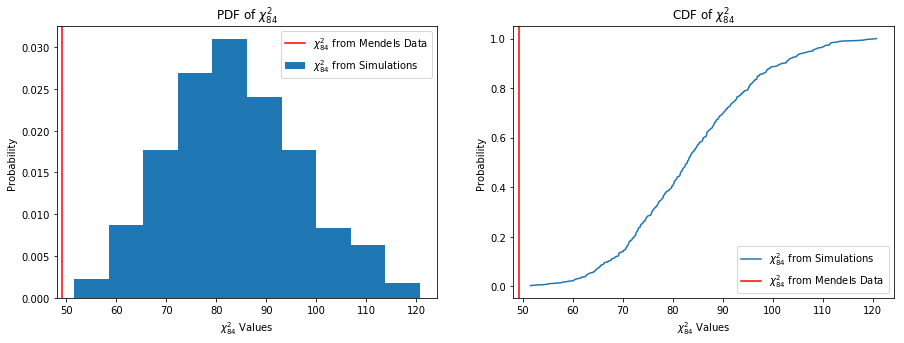

In [5]:
experiments = np.shape(data)[0] # number of experiments (84)
trials = 500 # number of simulations
N = np.zeros((trials, experiments)) # total observations in an experiment
p = np.zeros((trials, experiments))
q = np.zeros((trials, experiments))

obs = np.zeros((trials, experiments)) # number times observe allele 1
X_sqr = np.zeros((trials, experiments)) # X^2 for each experiment in each trial
X84 = np.zeros(trials) # X^2_84 for each trial

# Calculate X^2_84 for each trial - sum of X^2 across all 84 experiments
for ii in range(trials):
    for jj in range(experiments):
  
        N[ii, jj] = data[jj, 4]
        p[ii, jj] = data[jj, 0]/(data[jj, 0] + data[jj, 1])
        q[ii, jj] = 1-p[ii, jj]
        
        obs[ii, jj] = np.random.binomial(N[ii, jj], p[ii, jj])

        X_sqr[ii, jj] = (obs[ii, jj] - N[ii, jj]*p[ii, jj])**2/(N[ii, jj]*p[ii, jj]) + ((N[ii,jj]-obs[ii, jj]) - N[ii, jj]*q[ii, jj])**2/(N[ii, jj]*q[ii, jj])    

    X84[ii] = sum(X_sqr[ii, :])

# CDF of X^2, 84
valsX84, freqX84 = np.unique(X84, return_counts = True)
probX84 = freqX84/sum(freqX84)
cdf84 = np.zeros(len(valsX84))
for ii in range(len(valsX84)):
    if ii == 0:
        cdf84[ii] = probX84[ii]
    else:
        cdf84[ii] = cdf84[ii-1] + probX84[ii]

# Calculate X^2_84 of Mendel's Data
X84_m = sum(X_sqr_m)

# Compare simulations to Mendel's Data
c = 0
while X84[c] < X84_m:
    c += 1
print('The empirical probability of observing a X^2_84 smaller than Mendels is {:.2f}%'.format(cdf84[c]*100))
print('The empirical probability of observing a X^2_84 larger than Mendels is {:.2f}%'.format(100 - cdf84[c]*100))


# PDF of X^2_84   
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
hist = plt.hist(X84, density = True, label = '${\chi}^2_{84}$ from Simulations')
plt.axvline(X84_m, color = 'red', label = '${\chi}^2_{84}$ from Mendels Data')
plt.xlabel('${\chi}^2_{84}$ Values')
plt.ylabel('Probability')
plt.title('PDF of ${\chi}^2_{84}$')
plt.legend()

# CDF of X^2_84 
plt.subplot(1,2,2)
plt.plot(valsX84, cdf84, label = '${\chi}^2_{84}$ from Simulations')
plt.axvline(X84_m, color = 'red', label = '${\chi}^2_{84}$ from Mendels Data')
plt.xlabel('${\chi}^2_{84}$ Values')
plt.ylabel('Probability')
plt.title('CDF of ${\chi}^2_{84}$')
plt.legend()

The probability of observing a ${\chi}^2_{84}$ value less than that from Mendel's data is < 1%, which is less than 5% and not within the confidence interval for the null hypothesis. Therefore, we reject the null hypothesis, suggesting that Mendel may have falsified his data.

## Simulating Experiments without Expected 0.6291:0.3709 Ratio

Next I look at the 69 experiments that do not involve an expected ratio of 0.6291:0.3709 and use $\chi$ ($\sqrt{{\chi}^2}$) values for comparison. Similar to above, I simulate each of these 69 experiments 500 times and calculate the  $\chi$ values for each simulation, then compare these to the $\chi$ value from Mendel's data. 

Text(0.5, 1.0, 'Mendels Data')

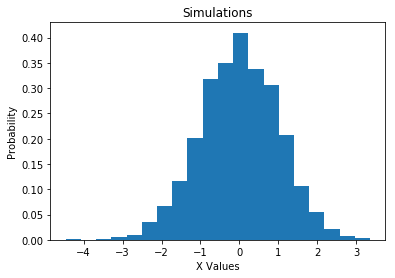

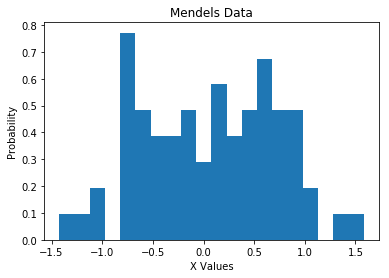

In [6]:
# isolate experiements without 0.6291:0.3709 ratio
data69 = []
experiments = np.shape(data)[0]
for ii in range(experiments):
    if data[ii, 0] != 0.6291:
        data69.append(data[ii, :])

data69 = np.array(data69)

# Simulate experiments
experiments = np.shape(data69)[0] # number of experiments (84)
trials = 100 # number of simulations
N = np.zeros((trials, experiments)) # total observations in an experiment
p = np.zeros((trials, experiments))
q = np.zeros((trials, experiments))
obs = np.zeros((trials, experiments))

X_s = [] # X value for simulations
X_m = [] # X value for Mendel's data

# calculate X statistic for simulations
for ii in range(trials):
    for jj in range(experiments):
        
        N[ii, jj] = data69[jj, 4]
        p[ii, jj] = data69[jj, 0]/(data69[jj, 0] + data69[jj, 1])
        q[ii, jj] = 1-p[ii, jj]
        obs[ii, jj] = np.random.binomial(N[ii, jj], p[ii, jj])
        
        X_s.append((obs[ii, jj] - N[ii, jj]*p[ii, jj])/np.sqrt(N[ii, jj]*p[ii, jj]*q[ii, jj]))

        
# calculate X statistic for Mendel's actual data
for ii in range(69):
    p = data69[ii, 0]/(data69[ii, 0] + data69[ii, 1])
    q = 1-p
    N = data69[ii, 4]
    X_m.append((data69[ii, 2] - N*p)/np.sqrt(N*p*q))


# Plot    
plt.figure(1)
plt.title('Distribution of X Statistics for Experiments without 0.6291:0.3709 Ratio')
plt.hist(X_s, bins = 20, density = True)
plt.xlabel('X Values')
plt.ylabel('Probability')
plt.title('Simulations')

plt.figure(2)
plt.hist(X_m, bins = 20, density = True)
plt.xlabel('X Values')
plt.ylabel('Probability')
plt.title('Mendels Data')



Text(0.5, 1.0, 'CDF of $\\chi$ Values - Zoomed In')

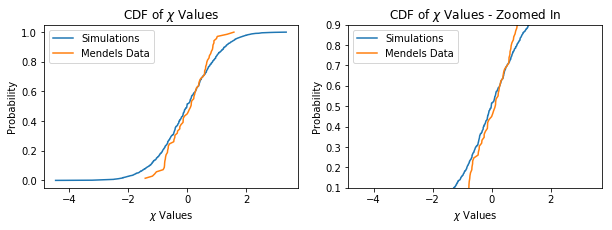

In [7]:
# CDF for X values from simulations
valsXs, freqXs = np.unique(X_s, return_counts = True)
probXs = freqXs/sum(freqXs)
cdfs = np.zeros(len(valsXs))
for ii in range(len(valsXs)):
    if ii == 0:
        cdfs[ii] = probXs[ii]
    else:
        cdfs[ii] = cdfs[ii-1] + probXs[ii]
        
# CDF for X values from Mendel's data
valsXm, freqXm = np.unique(X_m, return_counts = True)
probXm = freqXm/sum(freqXm)
cdfm = np.zeros(len(valsXm))
for ii in range(len(valsXm)):
    if ii == 0:
        cdfm[ii] = probXm[ii]
    else:
        cdfm[ii] = cdfm[ii-1] + probXm[ii]

plt.figure(1, figsize = (10, 3))
plt.subplot(121)
plt.plot(valsXs, cdfs, label = 'Simulations')
plt.plot(valsXm, cdfm, label = 'Mendels Data')
plt.xlabel('$\chi$ Values')
plt.ylabel('Probability')
plt.legend()
plt.title('CDF of $\chi$ Values')

plt.subplot(122)
plt.plot(valsXs, cdfs, label = 'Simulations')
plt.plot(valsXm, cdfm, label = 'Mendels Data')
plt.xlabel('$\chi$ Values')
plt.ylabel('Probability')
plt.ylim(.1, .9)
plt.legend()
plt.title('CDF of $\chi$ Values - Zoomed In')



The probability of $\chi$ values are very similar for the mid-ranges (0.25 < P(X) < 0.75). However, Mendel's data deviates from the simulations at the tails (P(X) < 0.25, P(X) > 0.75). This suggests that Mendel may have curated his data and removed extreme values to better fit expectations.

## Should Mendel have been concerned?

One of the most notable points in Mendel’s original paper is that at one point an experiment yielded 60 heterozygous plants for pod color and 40 were homozygous green,  when an expected ratio was 2:1.  This departure from expectation was so large that Mendel repeated this experiment recording 65:35 in the subsequent trial. This was the only experiment that Mendel felt compelled to repeat, but should he have been concerned? Here I use simulation to estimate the likelihood of such a deviation from expectation. 

Mendels data deviated from the expected value of 66.6 by 6.67 plants
The probability of observing a deviation >= to 6.67 from expectation is: 13.83%
The maximum deviation Mendel should allow from the expected 2:1 ratio is: 9.50


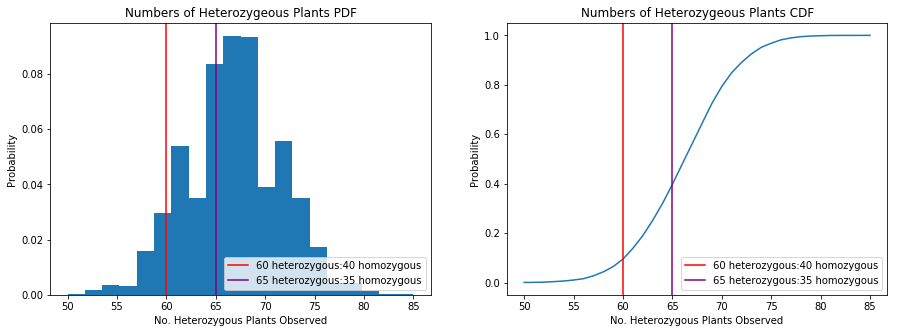

In [18]:
# simulate experiment
p = 2/3
q = 1-p
N = 100 # total number of plants
trials = 10000 

het = np.zeros((trials, int(N)))
obs = np.zeros(trials)
X = np.zeros(trials)

# calculate X values for simulations
for ii in range(trials):
    obs[ii] = np.random.binomial(N, p)
    X[ii] = (obs[ii] - N*p)/np.sqrt(N*p*q)

# X values for Mendel's results
X1 = (60 - 100*2/3)/np.sqrt(100*2/9)
X2 = (65 - 100*2/3)/np.sqrt(100*2/9)

# Calculate CDF for simulations
vals, freq = np.unique(obs, return_counts = True)
prob = freq/sum(freq)
cdf = np.zeros(len(vals))
for ii in range(len(vals)):
    if ii == 0:
        cdf[ii] = prob[ii]
    else:
        cdf[ii] = cdf[ii-1] + prob[ii]

# Compare simulations to Mendel's Data
c = 0
while vals[c] <= 60:
    c += 1
     
exp = 100 *2/3
dev = exp - 60
print('Mendels data deviated from the expected value of 66.6 by {:.2f} plants'.format(dev))
print('The probability of observing a deviation >= to {:.2f} from expectation is: {:.2f}%'.format(dev, cdf[c]*100))

# Find maximum deviation Mendel should allow before repeating his experiment
max_allow = (np.percentile(obs, 97.5) - np.percentile(obs, 2.5))/2
print('The maximum deviation Mendel should allow from the expected 2:1 ratio is: {:.2f}'.format(max_allow)) 

# Plot
plt.figure(1, figsize = (15, 5))

plt.subplot(121)
a = plt.hist(obs, density = True, bins = 20)
plt.axvline(60, color = 'red', label = '60 heterozygous:40 homozygous')
plt.axvline(65, color = 'purple', label = '65 heterozygous:35 homozygous')
plt.xlabel('No. Heterozygous Plants Observed')
plt.ylabel('Probability')
plt.legend(loc=4)
plt.title('Numbers of Heterozygeous Plants PDF')

plt.subplot(122)
plt.plot(vals, cdf)
plt.xlabel('No. Heterozygous Plants Observed')
plt.ylabel('Probability')
plt.title('Numbers of Heterozygeous Plants CDF')
plt.axvline(60, color = 'red', label = '60 heterozygous:40 homozygous')
plt.axvline(65, color = 'purple', label = '65 heterozygous:35 homozygous')
plt.legend(loc = 4)


Assuming a 5% likelihood of being generated by the null hypothesis, Mendel's deviation of 6.67 is smaller than the maximum allowable deviation to accept (9.5 plants). Therefore, Mendel should not have been concerned.